# 정형데이터 수집 분석 시각화
공공데이터포털 - 소상공인시장진흥공단_상가(상권)정보.csv   
상권업종소분류가 카페인 데이터만 사용   
시군구별 카페 개수 시각화(막대형, 산점도)   
시군구별 카페 개수 합계 출력    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

import warnings

warnings.filterwarnings('ignore')

#  폰트 관련 경고 메세지 제거(unicode warning)
plt.rcParams['axes.unicode_minus'] = False

#  한글 폰트 설정 - 폰트 경로를 직접 지정
font_path = "data/malgun.ttf"  # 폰트 파일 경로
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()  # 폰트 이름 가져오기

#  그래프 출력 사이즈 설정
plt.rcParams['figure.figsize'] = (8, 4)



In [51]:
df = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_서울_202409.csv', low_memory=False)
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
1,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
2,MA010120220805430797,가배차,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1171010400101430002012823,사이언스빌딩,서울특별시 송파구 가락로 209,138852,5663,NaN,1,NaN,127.116136,37.507170


In [59]:
cond = df['상권업종소분류명'] == '카페'
cafe = df.loc[cond, ['상호명','시군구명','행정동명', '위도','경도']].copy()

In [61]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20454 entries, 7 to 466021
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호명     20454 non-null  object 
 1   시군구명    20454 non-null  object 
 2   행정동명    20454 non-null  object 
 3   위도      20454 non-null  float64
 4   경도      20454 non-null  float64
dtypes: float64(2), object(3)
memory usage: 958.8+ KB


In [6]:
cafe.head()

,상호명,시군구명,경도,위도
7,카페숲,금천구,126.909939,37.446689
51,매머드커피외대,동대문구,127.056962,37.598493
53,포르마레,강동구,127.125070,37.530474
111,더웨이유통할리스커피,중구,127.010407,37.553952
116,카페브릿지,영등포구,126.929094,37.525184


In [63]:
loc_group = cafe.groupby(by='시군구명')
loc_group['시군구명'].head()

7        금천구
51      동대문구
53       강동구
111       중구
116     영등포구
        ... 
6481     양천구
6872     양천구
6981     금천구
7726     양천구
8294     양천구
Name: 시군구명, Length: 125, dtype: object

In [69]:
cafe_data = loc_group['시군구명'].value_counts()

In [77]:
cafe_data

시군구명
강남구     1928
강동구      677
강북구      452
강서구      932
관악구      721
광진구      731
구로구      553
금천구      507
노원구      614
도봉구      366
동대문구     632
동작구      567
마포구     1775
서대문구     632
서초구     1131
성동구      723
성북구      727
송파구     1259
양천구      539
영등포구    1068
용산구      791
은평구      570
종로구     1128
중구       947
중랑구      484
Name: count, dtype: int64

In [10]:
cafe_data = pd.DataFrame(cafe_data)

In [11]:
cafe_data.head()

,count
시군구명,
강남구,1928
강동구,677
강북구,452
강서구,932
관악구,721


<Axes: xlabel='시군구명'>

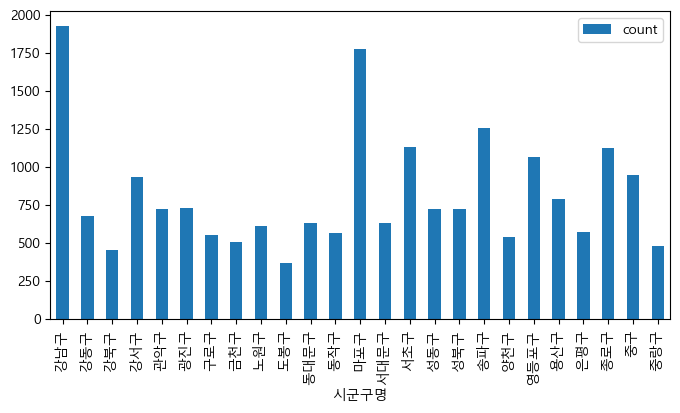

In [12]:
cafe_data.plot(kind='bar')

In [79]:
cafe.head()

,상호명,시군구명,행정동명,위도,경도
7,카페숲,금천구,시흥5동,37.446689,126.909939
51,매머드커피외대,동대문구,이문1동,37.598493,127.056962
53,포르마레,강동구,성내1동,37.530474,127.125070
111,더웨이유통할리스커피,중구,약수동,37.553952,127.010407
116,카페브릿지,영등포구,여의동,37.525184,126.929094


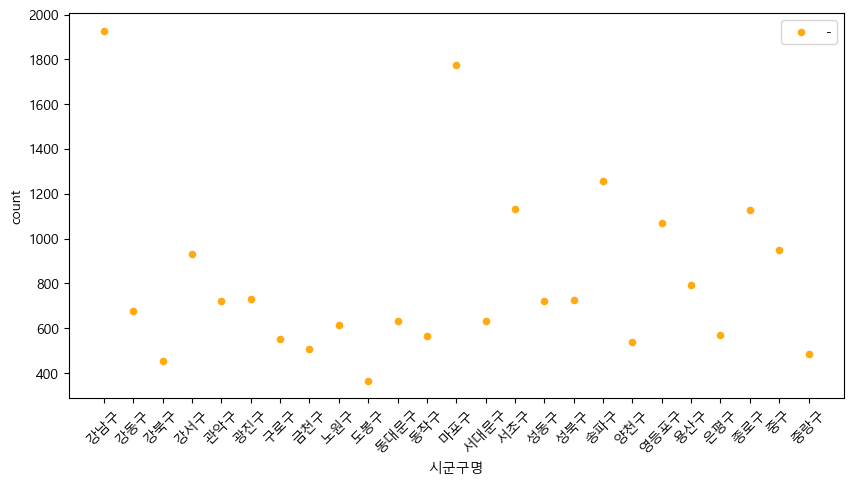

In [14]:
cafe_scatter = cafe_data.copy()
cafe_scatter.reset_index(inplace=True)
cafe_scatter.plot(kind='scatter', x='시군구명', y='count', c='#fa1', figsize=(10, 5), marker='o',  alpha=1)
plt.xticks(rotation=45)
plt.legend('---',loc='upper right')
plt.show()

In [45]:
# import folium as f
# cafe_map = f.Map(location=[37.55, 126.98], zoom_start=12)
# cafe_map


In [47]:
# for name, lat, lng in zip(cafe.index, cafe['위도'], cafe['경도']):
#      f.CircleMarker(location=[lat, lng],
#                     radius=3,
#                     color='#fa1',
#                     fill=True,
#                     fill_color='blue',
#                     fill_opacity=0.4,
#                     popup=cafe['상호명']
#                    ).add_to(cafe_map)

# cafe_map